In [1]:
import datadotworld as dw
import pandas as pd

dataset = dw.load_dataset('dcereijo/player-scores', force_update=True)

In [2]:
appearances = dataset.dataframes['appearances']
players = dataset.dataframes['players']
games = dataset.dataframes['games']

In [3]:
appearances_players = pd.merge(
    appearances,
    players,
    on="player_id"
)

merged = pd.merge(
    appearances_players,
    games,
    on="game_id"
)

scored_goals = merged.groupby(
    by=["league_code", "season", "player_id"]
).sum()["goals"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa5f3cfa00>,
      dtype=object)

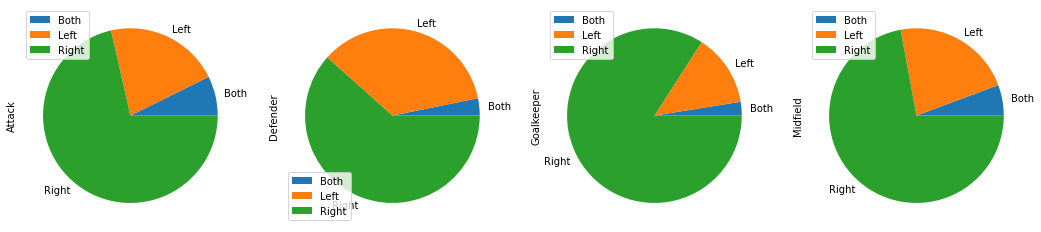

In [72]:
import matplotlib.pyplot as plt
plt.close("all")

players_by_foot = players[players["foot"] != "N/a"].groupby(by=["position", "foot"]).count()["player_id"]
players_by_foot.unstack().transpose().plot.pie(subplots=True, figsize=(18, 18))

In [ ]:
plt.savefig('foot_proportion_by_postition.png')